#### Recommender System for Instacart
- Create collaborative filtering recommender system by finding correlations.
- Provide some recommendations based on the analysis of data from Instacart.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Source - Instacart
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
opp = pd.read_csv('order_products__prior.csv')

#### Data overview

In [3]:
print(opp.shape)
opp.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Data manipulation
- Create new dataset in which product_id and user_id are matched

In [6]:
merged = pd.merge(opp, orders)
merged

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,prior,24,2,6,21.0
32434485,3421083,11352,7,0,25247,prior,24,2,6,21.0
32434486,3421083,4600,8,0,25247,prior,24,2,6,21.0
32434487,3421083,24852,9,1,25247,prior,24,2,6,21.0


In [7]:
merged['count'] = 1
group_agg = merged.groupby(['product_id', 'user_id']).agg(
    {'count':np.sum}).reset_index()
group_agg.head()

,product_id,user_id,count
0,1,138,2
1,1,709,1
2,1,764,2
3,1,777,1
4,1,825,1


- There were an index error when trying to create a pivot table, because of the scope of python memory
- Limit our data so we can make the size of data smaller

In [8]:
len(set(group_agg['product_id']))

49677

In [9]:
len(set(group_agg['user_id']))

206209

<AxesSubplot:>

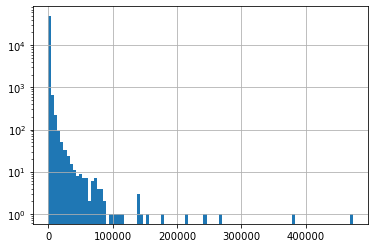

In [10]:
pro_c = group_agg.groupby('product_id').agg(
    {'count':np.sum}).sort_values(
    by='count').reset_index()
pro_c['count'].hist(bins=100, log=True)

# We can see a pareto distribution
# which means items that are frequently sold is actually very small part of the data

<AxesSubplot:>

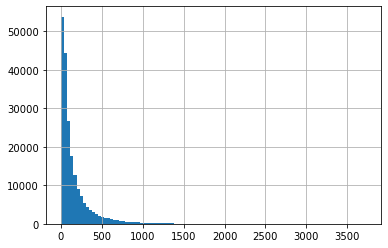

In [11]:
user_c = group_agg.groupby('user_id').agg(
    {'count':np.sum}).sort_values(
    by='count').reset_index()
user_c['count'].hist(bins=100)

Filtering

In [12]:
pop_products = set(pro_c.loc[pro_c['count'] > 1000]['product_id'])
heavy_users = set(user_c.loc[user_c['count'] > 1000]['user_id'])

In [13]:
p_filter = group_agg.loc[group_agg['product_id'].isin(pop_products)]
filtered = p_filter.loc[p_filter['user_id'].isin(heavy_users)]
filtered

,product_id,user_id,count
240,1,65325,6
286,1,80379,5
298,1,84549,37
316,1,90343,1
356,1,99045,2
...,...,...,...
13307536,49683,204455,1
13307574,49683,204757,16
13307640,49683,205213,11
13307646,49683,205237,6


#### Create pivot table

In [14]:
pvt = filtered.pivot_table(index='user_id', 
                           columns='product_id',
                           values='count').fillna(0)
print(pvt.shape)
pvt

(2090, 5043)


product_id,1,10,23,25,34,45,49,54,63,79,...,49585,49605,49609,49610,49615,49621,49628,49667,49680,49683
user_id,,,,,,,,,,,,,,,,,,,,,
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
205754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


#### Item-based collaborative filtering

In [15]:
item_corr = pvt.corr()
item_corr

product_id,1,10,23,25,34,45,49,54,63,79,...,49585,49605,49609,49610,49615,49621,49628,49667,49680,49683
product_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.003111,-0.003056,-0.003041,-0.005723,-0.007741,-0.003143,-0.001150,-0.004387,-0.005420,...,-0.005697,0.035005,-0.001831,0.008175,-0.001316,-0.004941,-0.005062,-0.001965,-0.003850,-0.010134
10,-0.003111,1.000000,-0.007181,0.020035,0.071872,-0.013600,-0.006017,-0.002703,-0.010309,-0.011685,...,-0.000953,-0.006512,-0.002690,-0.002684,-0.003091,-0.003770,0.085358,-0.002619,-0.009046,-0.020648
23,-0.003056,-0.007181,1.000000,-0.007021,-0.013211,0.042546,-0.007256,-0.002655,-0.006586,0.003785,...,-0.003953,-0.008921,-0.004226,-0.007214,-0.003037,-0.010661,-0.011686,-0.004536,-0.008889,0.028040
25,-0.003041,0.020035,-0.007021,1.000000,-0.003849,-0.006884,-0.007220,-0.002642,-0.000494,-0.010433,...,-0.009851,-0.008506,-0.004205,-0.007177,-0.003022,0.031743,0.027946,-0.004513,-0.008844,-0.012036
34,-0.005723,0.071872,-0.013211,-0.003849,1.000000,-0.019455,-0.008429,-0.004972,-0.002919,-0.018655,...,-0.010735,-0.005458,-0.007334,0.028161,-0.001461,-0.013314,0.041592,-0.006484,-0.009428,0.034392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49621,-0.004941,-0.003770,-0.010661,0.031743,-0.013314,-0.021880,0.012445,-0.004292,0.002198,-0.016258,...,0.092684,0.015823,-0.006831,-0.008889,-0.004909,1.000000,-0.006464,-0.005240,-0.000591,-0.006874
49628,-0.005062,0.085358,-0.011686,0.027946,0.041592,-0.007354,-0.011278,0.005867,-0.016775,-0.018454,...,-0.015312,-0.002013,0.098175,0.010330,-0.005030,-0.006464,1.000000,0.006015,0.091785,-0.016839
49667,-0.001965,-0.002619,-0.004536,-0.004513,-0.006484,-0.002722,-0.004664,-0.001707,-0.005683,-0.008043,...,-0.003079,0.005053,-0.002717,-0.003978,-0.001952,-0.005240,0.006015,1.000000,0.009923,-0.001568


Q. Which items are most likely sold with apple?

In [16]:
products.loc[products['product_name'] == 'Apple']

,product_id,product_name,aisle_id,department_id
48226,48227,Apple,8,3


In [17]:
interested = 48226
item_corr.sort_values(by=interested, ascending=False)[interested].head()

product_id
48226    1.000000
5923     0.451676
42731    0.420961
20382    0.345604
30759    0.336067
Name: 48226, dtype: float64

In [18]:
print(products.loc[products['product_id'] == 5923]['product_name'])
print(products.loc[products['product_id'] == 42731]['product_name'])
print(products.loc[products['product_id'] == 20382]['product_name'])
print(products.loc[products['product_id'] == 30759]['product_name'])

# We can recommend those items when our customers would like to purchase apple.

5922    Traditional Favorites Four Cheese Pasta Sauce
Name: product_name, dtype: object
42730    Original Citrus Sparkling Flavored Soda
Name: product_name, dtype: object
20381    Natural Honey Peanut Butter
Name: product_name, dtype: object
30758    Freezer Gallon Bags
Name: product_name, dtype: object


#### User-based collaborative filtering

In [19]:
user_corr = pvt.T.corr()
user_corr

user_id,140,210,290,323,444,462,786,894,999,1004,...,204715,204757,204802,205213,205237,205280,205631,205754,205804,205831
user_id,,,,,,,,,,,,,,,,,,,,,
140,1.000000,0.042492,-0.004311,0.135494,0.120313,0.122365,0.051208,0.094323,0.144025,0.141788,...,0.101279,0.040929,0.092238,0.005349,0.023663,0.049325,0.106536,0.181845,0.203519,0.101908
210,0.042492,1.000000,0.002462,0.077447,0.133634,0.058855,0.170616,0.020739,0.130397,0.068393,...,0.091264,0.118126,0.151294,0.001384,0.169462,0.097658,0.199516,0.056635,0.114650,0.065599
290,-0.004311,0.002462,1.000000,-0.006280,-0.005223,-0.002301,-0.005650,0.006339,-0.008738,-0.004714,...,-0.000027,-0.005533,-0.002294,0.031634,0.014298,0.007970,-0.007690,-0.007947,0.002245,-0.007959
323,0.135494,0.077447,-0.006280,1.000000,0.108512,0.193138,0.020311,0.041477,0.214460,0.097787,...,0.152893,0.049470,0.077831,-0.004731,0.054914,0.069658,0.209734,0.212071,0.211406,0.123826
444,0.120313,0.133634,-0.005223,0.108512,1.000000,0.144329,0.230553,0.103547,0.193615,0.136599,...,0.136430,0.043294,0.166402,0.028252,0.078303,0.035007,0.116903,0.046111,0.171208,0.102107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205280,0.049325,0.097658,0.007970,0.069658,0.035007,0.045503,0.115358,0.024495,0.106647,0.086172,...,0.095757,0.058942,0.062950,0.032848,0.144684,1.000000,0.063199,0.002222,0.059951,0.045890
205631,0.106536,0.199516,-0.007690,0.209734,0.116903,0.162045,0.116947,0.045547,0.189269,0.071515,...,0.063338,0.090340,0.174888,-0.005863,0.113093,0.063199,1.000000,0.112413,0.181356,0.071766
205754,0.181845,0.056635,-0.007947,0.212071,0.046111,0.019222,0.100541,-0.003108,0.129196,0.025127,...,0.023694,0.071114,0.079085,-0.004779,0.034096,0.002222,0.112413,1.000000,0.083851,0.049247


Q. For a customer (user_id is 323), who would be similar users?

In [20]:
interested = 323
user_corr.sort_values(by=interested, ascending=False)[interested].head()

user_id
323       1.000000
23405     0.529683
6268      0.484345
15229     0.458034
138772    0.433920
Name: 323, dtype: float64

In [21]:
user1, user2 = 323, 23405
u1 = set(filtered.loc[filtered['user_id'] == user1]['product_id'])
u2 = set(filtered.loc[filtered['user_id'] == user2]['product_id'])
diff = u2.difference(u1)
diff

# Those are the products we would recommend, among the items that user1 has not purchased. 

{116,
 1398,
 1463,
 2452,
 3098,
 4138,
 4605,
 5077,
 6101,
 6475,
 7948,
 10248,
 10369,
 12419,
 12442,
 12456,
 12576,
 13245,
 13512,
 13565,
 13870,
 14277,
 14437,
 14992,
 15438,
 16617,
 16987,
 18434,
 18761,
 18770,
 19451,
 20583,
 20767,
 21653,
 21681,
 21903,
 22124,
 22802,
 23516,
 24838,
 24954,
 26768,
 29285,
 29694,
 31506,
 32655,
 32691,
 33198,
 33290,
 33731,
 34551,
 35108,
 35140,
 35749,
 36036,
 36606,
 36929,
 38490,
 39947,
 40199,
 40411,
 40571,
 40910,
 41238,
 41387,
 41836,
 41950,
 42265,
 43713,
 44053,
 44120,
 44359,
 44375,
 44422,
 44628,
 45002,
 45747,
 47034,
 47087,
 47185,
 47547,
 48628,
 49111}

Convert to ratio

In [22]:
orders['user_id'].value_counts().reset_index()

,index,user_id
0,82420,100
1,154678,100
2,134199,100
3,60040,100
4,143177,100
...,...,...
206204,109381,4
206205,169577,4
206206,167530,4
206207,105283,4


In [23]:
user_counts = pd.DataFrame(orders['user_id'].value_counts()).reset_index()
user_counts.columns = ['user_id', 'user_freq']
user_counts

,user_id,user_freq
0,82420,100
1,154678,100
2,134199,100
3,60040,100
4,143177,100
...,...,...
206204,109381,4
206205,169577,4
206206,167530,4
206207,105283,4


In [24]:
gu = pd.merge(group_agg, user_counts)
gu

,product_id,user_id,count,user_freq
0,1,138,2,33
1,907,138,2,33
2,1000,138,1,33
3,3265,138,1,33
4,4913,138,1,33
...,...,...,...,...
13307948,49075,136325,3,4
13307949,49235,27382,9,10
13307950,49235,56454,4,5
13307951,49235,80734,3,4


In [25]:
gu['ratio'] = gu['count'] / gu['user_freq']
gu.head()

,product_id,user_id,count,user_freq,ratio
0,1,138,2,33,0.060606
1,907,138,2,33,0.060606
2,1000,138,1,33,0.030303
3,3265,138,1,33,0.030303
4,4913,138,1,33,0.030303


In [26]:
gu.sort_values(by='user_freq', ascending=False)

,product_id,user_id,count,user_freq,ratio
5124820,18095,119028,1,100,0.01
7889236,46226,70742,1,100,0.01
7889222,43069,70742,1,100,0.01
7889223,43171,70742,1,100,0.01
7889224,43200,70742,1,100,0.01
...,...,...,...,...,...
12913012,11422,99214,3,4,0.75
12913011,10473,99214,1,4,0.25
12913010,10087,99214,3,4,0.75
12913009,4591,99214,1,4,0.25


Q. Which items do our regular customers usually purchase?

In [27]:
gu.loc[gu['user_freq'] == 100].sort_values(by='ratio')[::-1]

,product_id,user_id,count,user_freq,ratio
9232495,38652,41356,99,100,0.99
9232456,14366,41356,99,100,0.99
12576282,25133,141736,99,100,0.99
9232438,6583,41356,99,100,0.99
12837990,4210,17997,99,100,0.99
...,...,...,...,...,...
2601107,31663,1958,1,100,0.01
2601108,32655,1958,1,100,0.01
6388311,18963,5296,1,100,0.01
2601113,34282,1958,1,100,0.01


In [28]:
products.loc[products['product_id'] == 	38652]

# Product that a customer (who have made purchase 100 times) put 99 times in the cart

,product_id,product_name,aisle_id,department_id
38651,38652,Yerba Mate Orange Exuberance Tea,64,7


Q. Which item is being sold most?

array([[<AxesSubplot:title={'center':'ones'}>]], dtype=object)

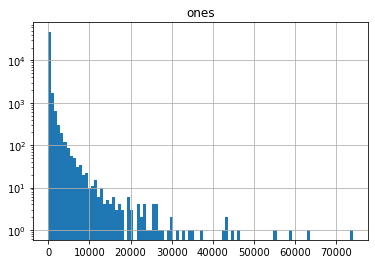

In [29]:
gu['ones'] = 1
gu.groupby('product_id').agg({'ones':np.sum}).hist(bins=100, log=True)

In [30]:
gu.groupby('product_id').agg({'ones':np.sum}).sort_values(
    by='ones', ascending=False).head()

,ones
product_id,
24852,73956
13176,63537
21137,58838
21903,55037
47626,46402


In [31]:
products.loc[products['product_id'] == 24852]

# Bananas are the most popular item in the Instacart. Follwed by strawberries, spinaches, etc.

,product_id,product_name,aisle_id,department_id
24851,24852,Banana,24,4


In [32]:
products.loc[products['product_id'] == 21137]

,product_id,product_name,aisle_id,department_id
21136,21137,Organic Strawberries,24,4
